# 다른 크레이트에서 지정한 트레이트를 사용하려면 먼저 크레이트부터 로딩해야 함 

## 1. 타입정보를 확인하는 크레이트 사용하기 

###  1-1 외부 크레이트 로딩 및 트레이트 참조하기

- :dep 크레이트이름 = 버전
- 외부 크레이트를 로딩 후에 use을 사용해서 사요하는 모듈

In [4]:
:dep typename = "0.1.2"

### 1-2 모듈의 트레이트를 사용

- 이 트레이트 내의 메서드들을 다양한 자료형에서 구현이 되어있다.
- 먼저 트레이트를 사용한다고 지정해야 구현된 메서드를 사용할 수 있다. 

In [5]:
use typename::TypeName;

## 튜플 타입 알아보기



- 배열과 마찬가지로 튜플은 고정 길이를 갖습니다.

- 튜플은 서로 다른 타입의 값들을 하나의 복합 타입으로 묶습니다.

- 튜플에 속한 값은 t.0, t.1과 같이 인덱스로 접근할 수 있습니다.

- 비어있는 튜플()은 단위 타입(unit type)이라고도 합니다. 이는 타입이면서 해당 타입의 유일하며 유효한 값입니다. 즉 타입과 값이 모두 ()입니다. 예를 들어 함수나 식에서 반환 값이 없음을 나타낼 때 사용합니다.

- 다른 언어에서 익숙한 void 개념으로 생각할 수 있습니다.

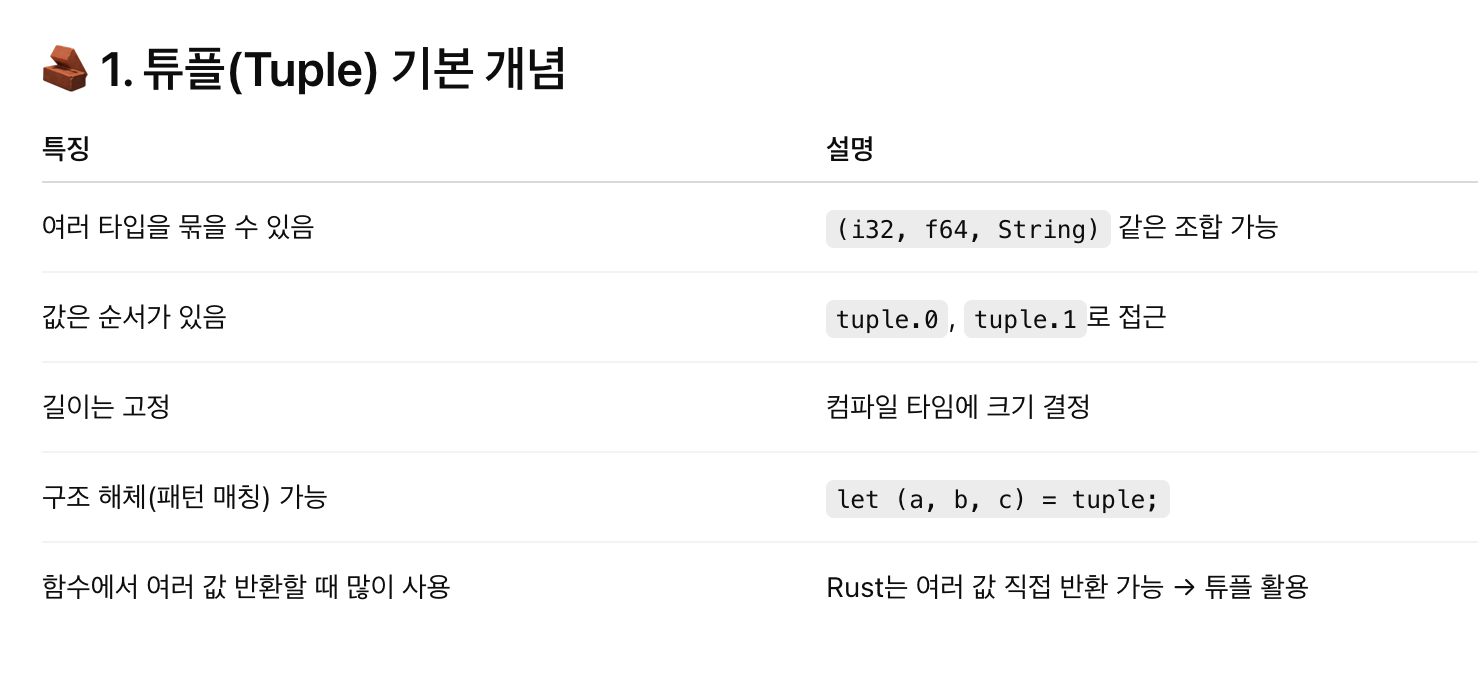

## 2.  다양한 튜플 정의하기 

### 튜플의 특징

- 다양한 자료형을 하나로 묶어서 사용할 수 있다

### 튜플을 지정하는 방법 

- 아무것도 없는 튜플 : () (unit)
- (f64, f64)
- (String, i32)
- (i32, String)  // 순서대로 타입을 지정
- (i32, f64, Vec<String>, Option<bool>)

### 2-1 튜플 타입 알아보기 

### 정수 값에 따른 타입 확인 

In [2]:
let a = 100;

In [6]:
a.type_name_of()

"i32"

###  문자열 리터럴 타입 확인 

In [7]:
let s = "String";

In [8]:
s.type_name_of()

"str"

### 튜플 리터럴 정의 

In [9]:
let tup = (1,2,3,4,5);

In [10]:
tup

(1, 2, 3, 4, 5)

### 튜플의 타입을 확인하기 

In [11]:
tup.type_name_of()

"(i32, i32, i32, i32, i32)"

### 2-2 튜플의 타입및 출력해보기

- 튜플 리터럴은 괄호와 값을 쉼표로 분리 
- 튜플은 디스플레이 트레이트를 구현하지 않아서 Debug로 출력

### 튜플은 디스플레이 트레이트를 구현하지 않아서 Debug로 출력

In [12]:
fn main() {
    let tup = (1,2,3,4,5);                       // 여러 원소를 나열해서 정의 
    
    println!(" type = {}", tup.type_name_of());  // 튜플의 자료형 확인 
    println!(" data = {:?}", tup);               // Debug 출력
    
    let _y = tup;
    println!(" data = {:?}", tup);               // Debug 출력
    println!(" data = {:?}", _y);               // Debug 출력
    
}

main();

 type = (i32, i32, i32, i32, i32)
 data = (1, 2, 3, 4, 5)
 data = (1, 2, 3, 4, 5)
 data = (1, 2, 3, 4, 5)


## 3. 튜플 원소를  참조하기

### 구조분해
- 튜플의 값을 변수에 할당해서 할당할 수 있음

### 인덱스 참조
- 인덱스의 번호를 사용해서 참조

### 3-1  튜플의 원소를 인덱스와 구조분해 참조하기 

In [14]:
fn main() {
    let t: (i8, bool) = (7, true);        // 구조분해처리
    println!("1st index: {}", t.0);       // 인덱스 참조처리 
    println!("2nd index: {}", t.1);
    
    let (a,b,c) = (10,20,30);             // 구조분해 
    println!(" a={}, b={}, c={}",a,b,c);  // 변수를 출력하기 
}

main();

1st index: 7
2nd index: true
 a=10, b=20, c=30


### 3-2 튜플 구조 분해시 미사용 처리

- 사용하지 않는 튜플은 _ 를 사용해서 배제할 수 있음 

In [15]:
fn main() {
    
    let text = "I see the eigenvalue in thine eye";          // 문자열 리터럴 생성 
    let (mut head, mut tail) = text.split_at(21);            // 문자열 리터럴을 특정 위치에서 분리하기  
          
    println!(" head : {}", head);
    println!(" tail : {}", tail);
    
    let t4 = (100,200,300,400,500);
    let (ii0,_,_,_,ii4) = t4;                                // 튜플 구조분해할 때 사용하는 변수만 정의 첫번째와 마지막만 사용하기 
    println!("ii0={}, ii4={}", ii0, ii4);                    // 사용하지 않는 경우는 밑줄 즉 _ 로 표시
}

main();

 head : I see the eigenvalue 
 tail : in thine eye
ii0=100, ii4=500


### 3-3 튜플 구조 분해시 미사용 처리 :  생략 처리 

- 생략은 .. 을 사용 

In [16]:
fn main() {
    let t5 = (100,200,300,400,500);
    let (i0,..,i4) = t5;                    // 5개 원소를 가진 튜플 앞과 뒤만 사용하고 중간은 생략
    println!("i0={}, i4={}", i0, i4);
    
    let (ij0,..) = t5;                      // 맨 앞의 원소만 사용하고 나머지 생략 
    println!("ij0={}", ij0);
    
    let (..,ij4) = t5;                      // 맨 뒤의 원소만 사용하고 나머지 생략 
    println!("ij4={}", ij4);
}

main();

i0=100, i4=500
ij0=100
ij4=500


### 3-4 구조분해로 변수 스왑처리

- 두 개의 변수의 값을 바꾸기 

In [17]:
fn swap_int(x :i32, y :i32) -> (i32, i32) {
    let (x,y) = (y,x);
    println!("x={}, y={}", x,y);
    (x,y)
}

swap_int(100,200);

x=200, y=100


### 3-5 튜플은 별도의 인덱스를 제공

In [18]:
let tup = (20,30,40);

println!(" tup.0={}, tup.1={}, tup.2={}", tup.0,tup.1, tup.2);

 tup.0=20, tup.1=30, tup.2=40


## 4.  튜플 변경 

- Rust에서 튜플은 변경 불가능한(immutable) 요소로 구성됩니다. 
- 튜플의 요소는 생성된 후에는 변경할 수 없습니다. 
- 따라서 튜플에 할당된 값은 변경할 수 없으며, 튜플의 요소에 접근하여 값을 수정하는 것도 불가능합니다.



### 4-1 튜플의 변경은 새로운 튜플을 만드는 것

- 하지만 튜플의 요소로 변경 가능한(mut) 타입을 포함하는 경우, 해당 요소의 값을 변경할 수 있습니다. 
- 예를 들어, 튜플의 요소 중 하나가 가변 변수인 경우 그 변수의 값을 변경할 수 있습니다.

In [19]:
fn main() {
    let mut tuple = (10, String::from("Hello"), true);

    tuple.0 = 20;                   // 변경 가능한 요소 수정
    tuple.1.push_str(", World!");   // 변경 가능한 요소 수정

    println!("{:?}", tuple);        // (20, "Hello, World!", true)
    
    
}

main();

(20, "Hello, World!", true)


## 4-2 튜플 내부의 원소가 별경가능할 경우 소유권 이동 발생 

### 튜플이 원소가 변경가능한 타입일 경우 

- 변경은 가능하므로
- 다른 변수에 할당하면 사용할 수 없음 

In [20]:
fn main() {
    let mut tuple = (10, String::from("Hello"), true);

    tuple.0 = 20;                   // 변경 가능한 요소 수정
    tuple.1.push_str(", World!");   // 변경 가능한 요소 수정

    println!("{:?}", tuple);        // (20, "Hello, World!", true)
    
    let _x = tuple;
    println!("{:?}", tuple);        // (20, "Hello, World!", true)
    
}

main();

Error: borrow of moved value: `tuple`

###  튜플 변경후에 다른 변수에 할당까지는 아무런 문제 없음 

In [13]:
fn main() {
    let mut tuple = (10, String::from("Hello"), true);

    tuple.0 = 20;                   // 변경 가능한 요소 수정
    tuple.1.push_str(", World!");   // 변경 가능한 요소 수정

    println!("{:?}", tuple);        // (20, "Hello, World!", true)
    
    let _x = tuple;
    //println!("{:?}", tuple);        // (20, "Hello, World!", true)
    
}

main();

(20, "Hello, World!", true)


### 4-3 튜플의 출력 

### 구조를 가지게  때문에 Display로 출력이 불가함 

In [21]:
let x = (1,2,3);

let y = x;

println!("{}", x);

Error: `({integer}, {integer}, {integer})` doesn't implement `std::fmt::Display`

### 튜플도 기본으로 출력이 불가 

- 그래서 Debug 로 출력해야 함 

In [22]:
let x = (1,2,3);

let y = x;

println!("{:?}", x);

(1, 2, 3)


### 3-4 튜플은 기본 소유권 이동되지 않고 값 복사된다. 

- 튜플의 값을 다른 변수에 할당하면 두 변수를 그대로 사용할 수 있다
- 단 Copy 트레이트가 구현된 기본 타입일 경우만 해당한다

### 포인터 처리 모듈

- 포인터를 비교할 때 사용함 

In [14]:
use std::ptr

In [15]:
let x = (1,2,3);

let y = x;

println!("{:?}", x);
println!("{:?}", y);

println!("{}", std::ptr::eq(&x, &y));

(1, 2, 3)
(1, 2, 3)
false


### 3-5  튜플 내의 String 등 참조 객체가 들어오면 이동

- 즉 프리미티브만으로 구성될 경우만 복사가 발생 

In [16]:
fn main() { 
    
    let x = (Box::new("가을"),Box::new("겨울"), Box::new("봄"));

    let y = x;            // 이동됨 

    println!("{:?}", x);
    println!("{:?}", y);

    println!("{}", std::ptr::eq(&x, &y));
}

main();

Error: borrow of moved value: `x`

### 튜플도 내부 원소가 소유권 이동이면 전체가 소유권 이동됨 

In [17]:
fn main() { 
    
    let x = (Box::new("가을"),Box::new("겨울"), Box::new("봄"));

    let y = x.clone();            // 복제함 

    println!("{:?}", x);
    println!("{:?}", y);

    println!("{}", std::ptr::eq(&x, &y));
}

main();

("가을", "겨울", "봄")
("가을", "겨울", "봄")
false
